In [72]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
SEED=  np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

  


In [73]:

# Load ARFF file
with open("/Users/osaosberto/Downloads/Bank_Marketing_Dataset.arff", "r", encoding="utf-8") as file:
    data = arff.load(file)

# Extract attributes (column names)
column_names = [attr[0] for attr in data["attributes"]]

# Convert to DataFrame
df = pd.DataFrame(data["data"], columns=column_names)


# Save as CSV
df.to_csv("output.csv", index=False)

print("Conversion complete: output.csv")


Conversion complete: output.csv


In [74]:
# copy the original dataset
df1= df.copy()

In [75]:
# cheecking for null values in the dataset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [76]:
# checking for dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [77]:
# brief description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [78]:
# checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

<Figure size 1000x600 with 0 Axes>

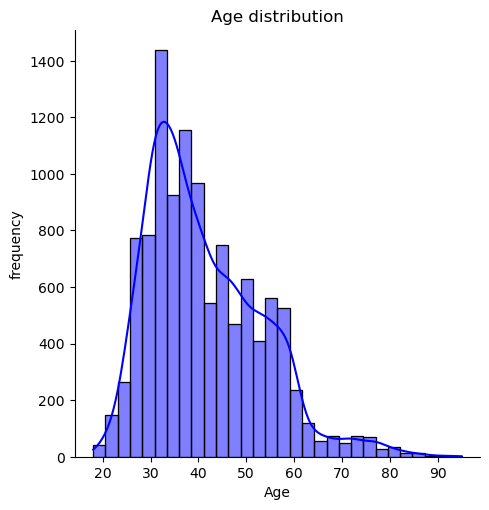

In [79]:
# comparing customer Age and occupation 
plt.figure(figsize=(10,6))
sns.displot(df['age'], kde=True, color='blue', bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()


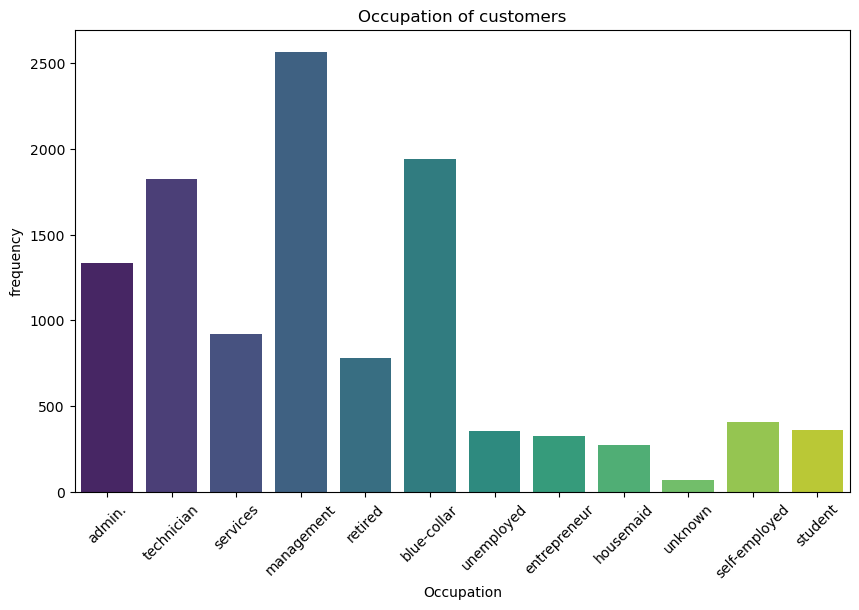

In [80]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='job', data=df, palette='viridis')
plt.title('Occupation of customers')
plt.xlabel('Occupation')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

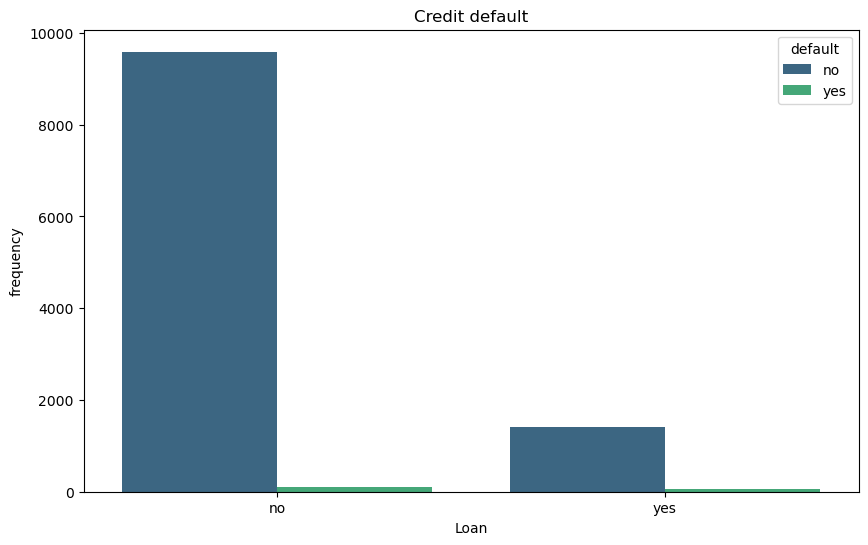

In [81]:
#comparing personal loans  and credit default
plt.figure(figsize=(10,6))
sns.countplot(x='loan', data=df, palette='viridis', hue= 'default') 
plt.title('Credit default')
plt.xlabel('Loan')
plt.ylabel('frequency')
plt.show()

In [82]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


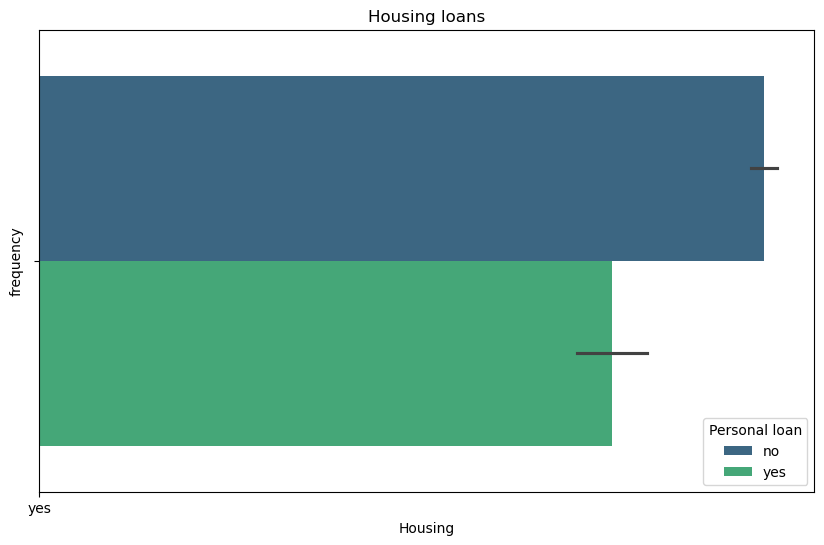

In [83]:
#  comparing housing loans and personal loans
plt.figure(figsize=(10,6))
sns.barplot(x='housing', data=df, palette='viridis', hue='loan')
plt.title('Housing loans')
plt.xlabel('Housing')
plt.ylabel('frequency')
plt.legend(title='Personal loan')
plt.show()

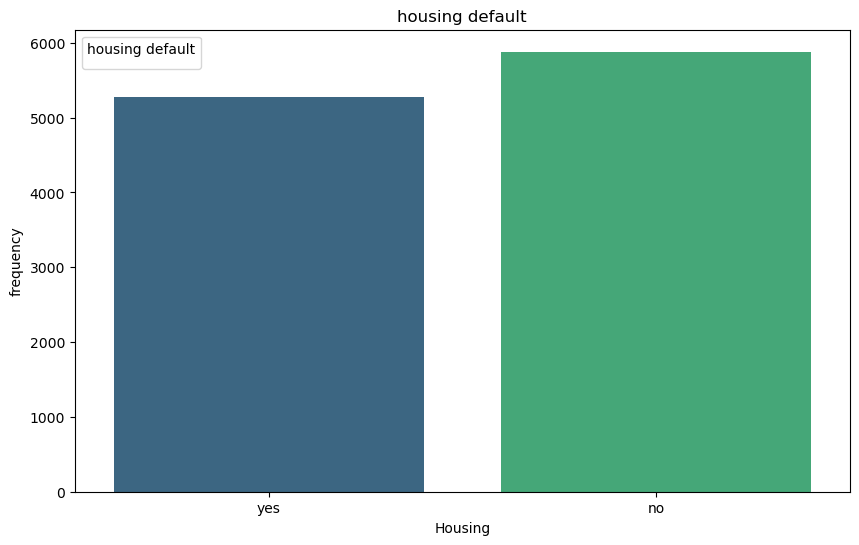

In [84]:
# checking customer default by housing  
plt.figure(figsize=(10,6))
sns.countplot(x='housing', data=df, palette='viridis')
plt.title('housing default')
plt.xlabel('Housing')
plt.ylabel('frequency')
plt.legend(title='housing default')
plt.show()  

<Axes: ylabel='count'>

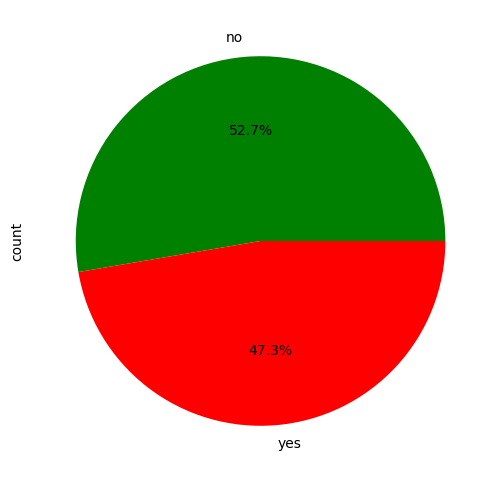

In [85]:
# compariing percentage of housing loans default
# percentage of housing loans default show a relatively high percentage of default
df_hose= df['housing'].value_counts()/len(df['housing'])*100 
df_hose.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(10,6))

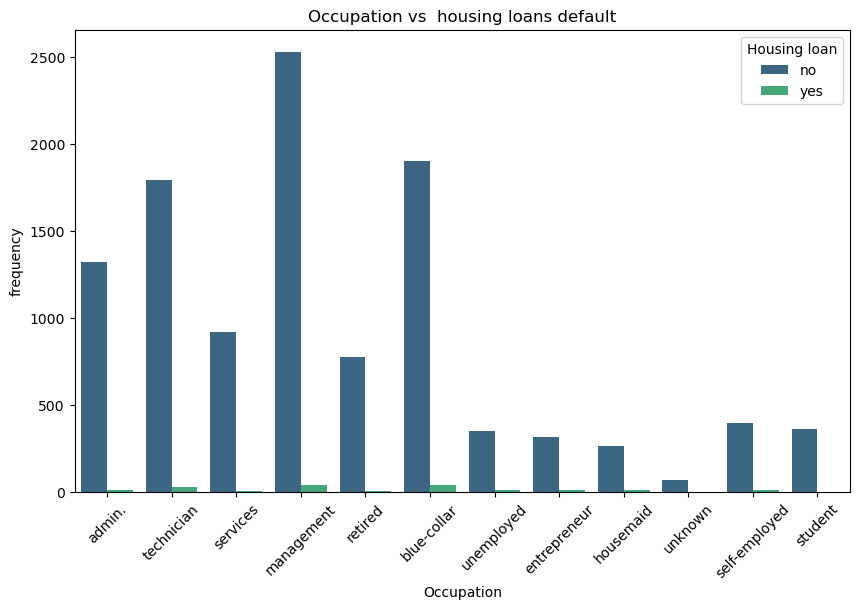

In [86]:
# comparing occapation and housing loans default
plt.figure(figsize=(10,6))      
sns.countplot(x='job', data=df, palette='viridis', hue= 'default')
plt.title('Occupation vs  housing loans default')
plt.xlabel('Occupation')   
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.legend(title='Housing loan')
plt.show()


In [87]:
# percentage of occupation by  default
# management and blue-collar have the highest percentage of NO  default 
# student have the percentage of YES default
df_de = df[['job','default']].value_counts()/len(df['job'])*100
df_de

job            default
management     no         22.639312
blue-collar    no         17.048916
technician     no         16.072388
admin.         no         11.852715
services       no          8.206415
retired        no          6.925282
self-employed  no          3.556710
student        no          3.216269
unemployed     no          3.126680
entrepreneur   no          2.848952
housemaid      no          2.383085
unknown        no          0.618169
blue-collar    yes         0.367318
management     yes         0.349400
technician     yes         0.259810
admin.         yes         0.098549
entrepreneur   yes         0.089590
housemaid      yes         0.071672
self-employed  yes         0.071672
unemployed     yes         0.071672
services       yes         0.062713
retired        yes         0.044795
student        yes         0.008959
unknown        yes         0.008959
Name: count, dtype: float64

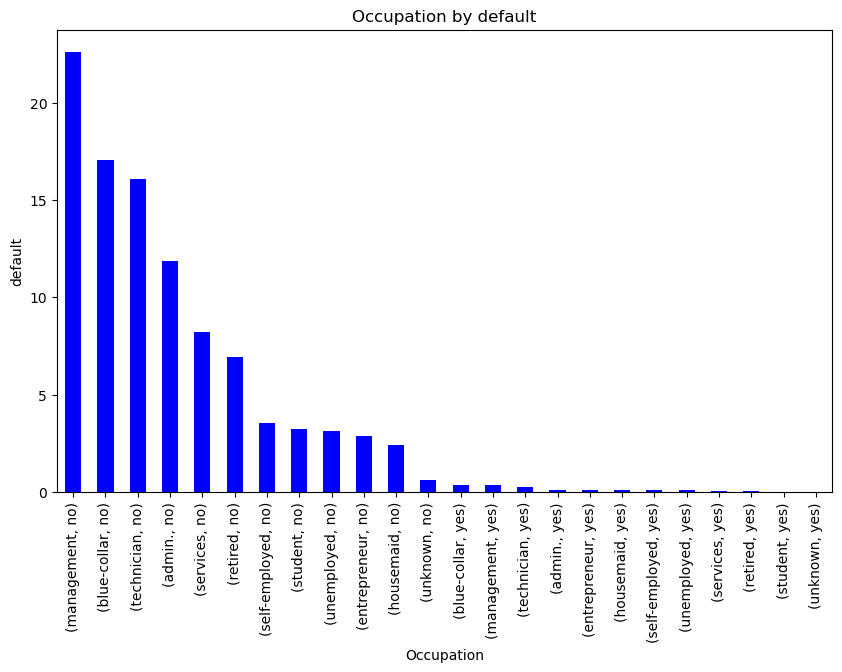

In [88]:
df_de.plot(kind= 'bar', color='blue', figsize=(10,6))
plt.title('Occupation by default')
plt.xlabel('Occupation')
plt.ylabel('default')
plt.xticks(rotation=90)
plt.show()

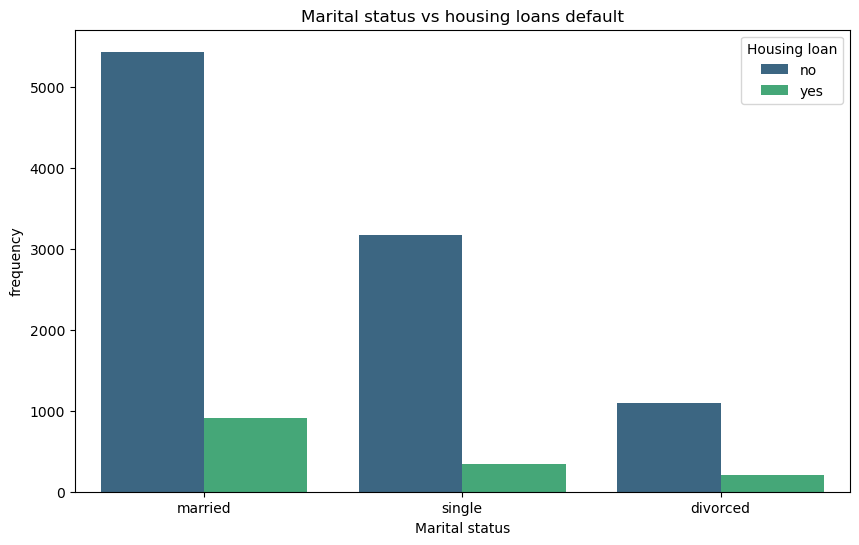

In [89]:
# comparing marital status and personal  loans
plt.figure(figsize=(10,6))
sns.countplot(x='marital', data=df, palette='viridis', hue= 'loan')
plt.title('Marital status vs housing loans default')
plt.xlabel('Marital status')
plt.ylabel('frequency')
plt.legend(title='Housing loan')
plt.show()      

In [90]:
# percentage of marital status by default
# married have the highest percentage of NO default
df_m= df[['marital','default']].value_counts()/len(df['marital'])*100
df_m

marital   default
married   no         56.083139
single    no         31.078660
divorced  no         11.333094
married   yes         0.815266
single    yes         0.438989
divorced  yes         0.250851
Name: count, dtype: float64

<Axes: xlabel='marital,default'>

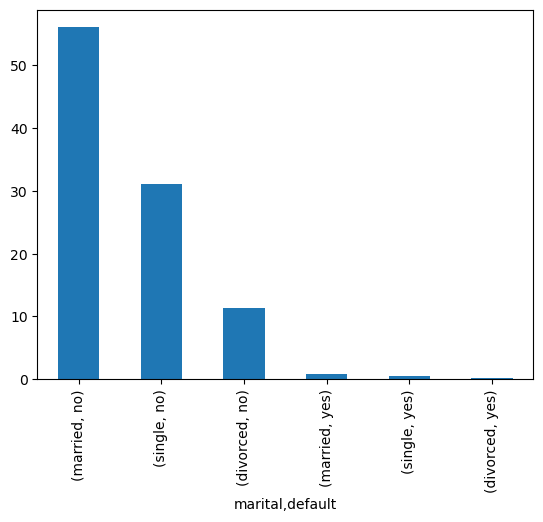

In [91]:
# percentage of marital status by default
# married have the highest percentage of NO default

df_m.plot(kind='bar')

In [92]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


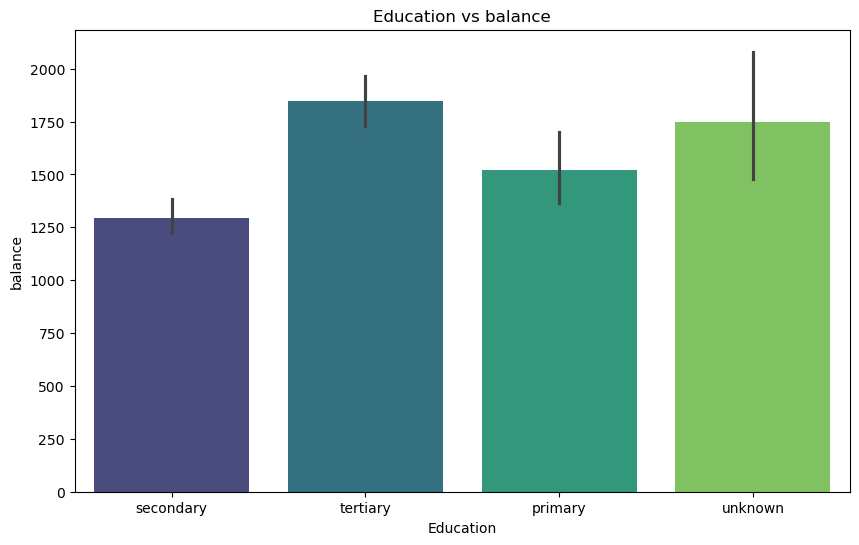

In [93]:
# comparing educational status with balance
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='balance', data=df, palette='viridis')
plt.title('Education vs balance')
plt.xlabel('Education')
plt.ylabel('balance')
plt.show()

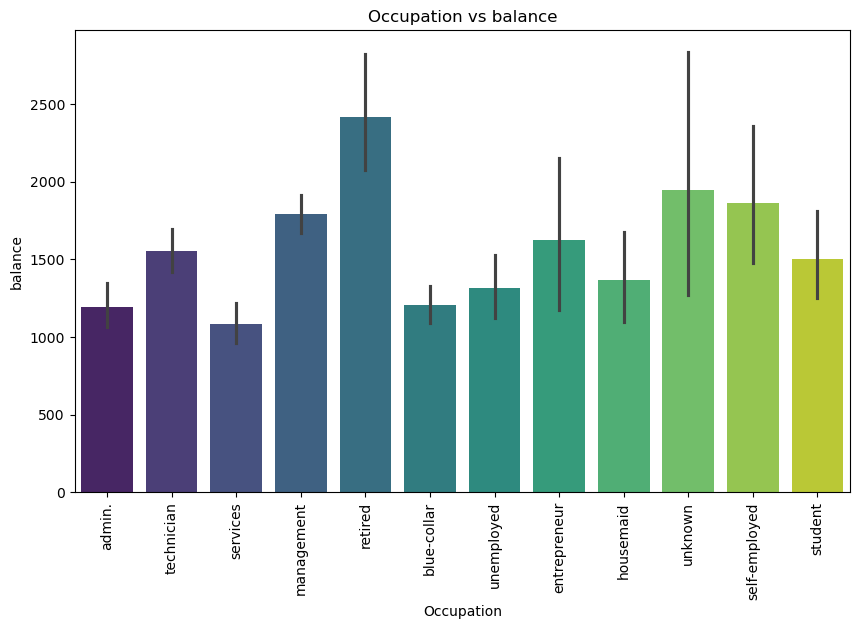

In [94]:
# occupation with the highest amount of balance
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='balance', data=df, palette='viridis')
plt.title('Occupation vs balance')
plt.xlabel('Occupation')
plt.ylabel('balance')
plt.xticks(rotation=90)
plt.show();


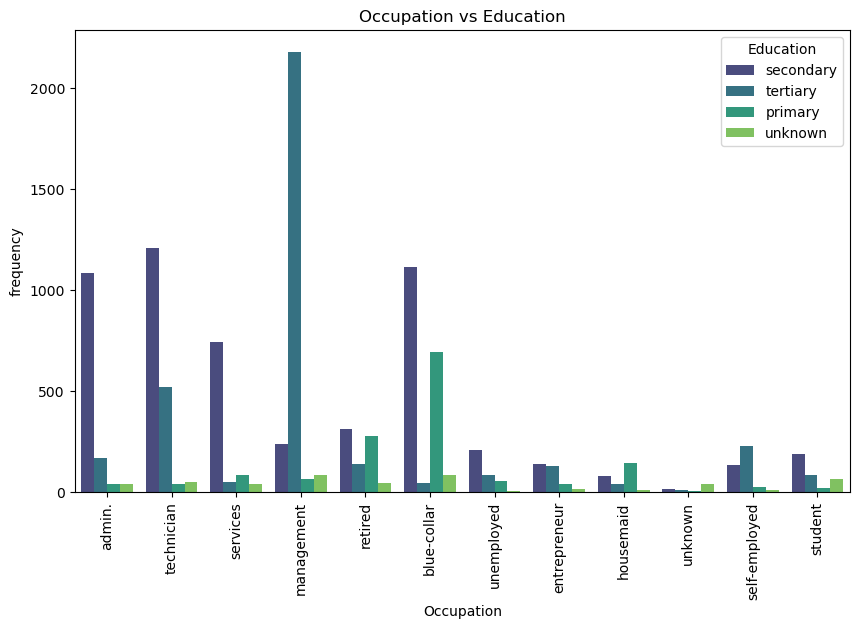

In [95]:
# comparing customer job and level of education
plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df, palette='viridis', hue='education')
plt.title('Occupation vs Education')
plt.xlabel('Occupation')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.legend(title='Education')
plt.show()

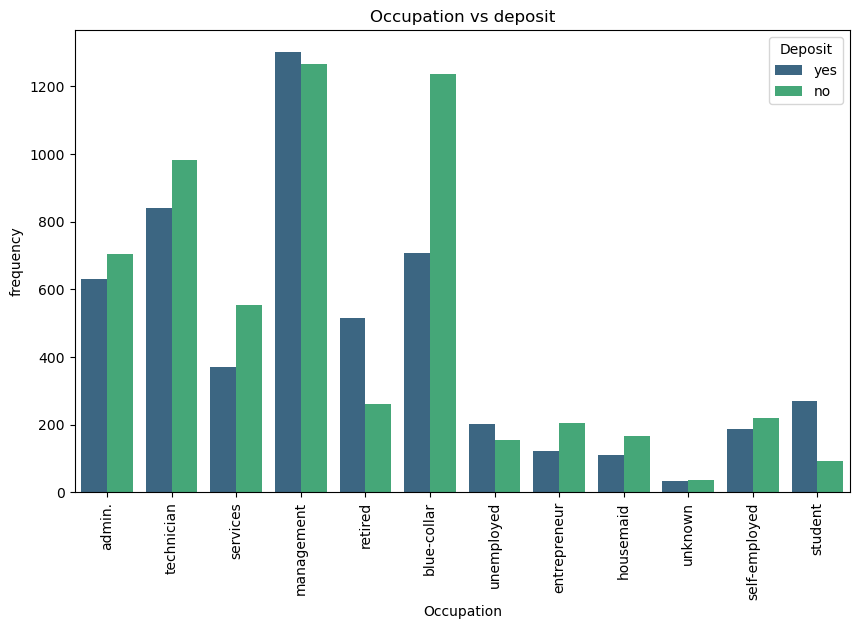

In [96]:
# comparing customer with depoist choice 
plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df, palette='viridis', hue='deposit')
plt.title('Occupation vs deposit')
plt.xlabel('Occupation')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.legend(title='Deposit')
plt.show()  

In [97]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


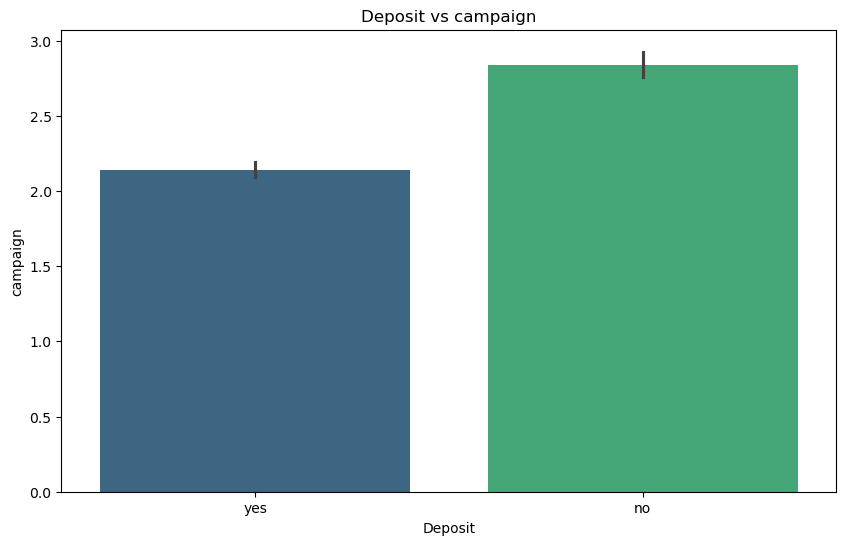

In [98]:
# comparing  customer desposit and campaign
plt.figure(figsize=(10,6))
sns.barplot(x='deposit', y='campaign', data=df, palette='viridis')      
plt.title('Deposit vs campaign')
plt.xlabel('Deposit')
plt.ylabel('campaign')
plt.show()  

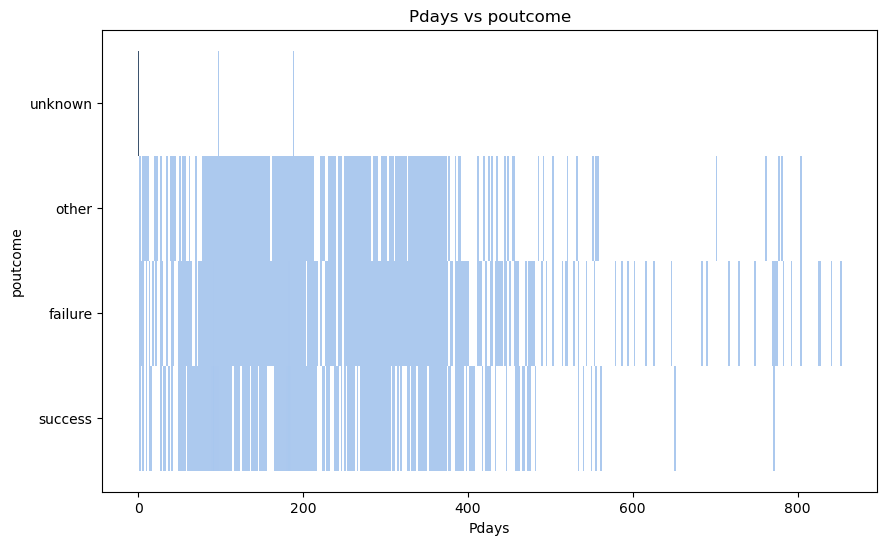

In [99]:
# comparing pdays and poutcome
plt.figure(figsize=(10,6))
sns.histplot(x='pdays', y='poutcome', data=df, palette='green and red')   
plt.title('Pdays vs poutcome')
plt.xlabel('Pdays')
plt.ylabel('poutcome')
plt.show()  

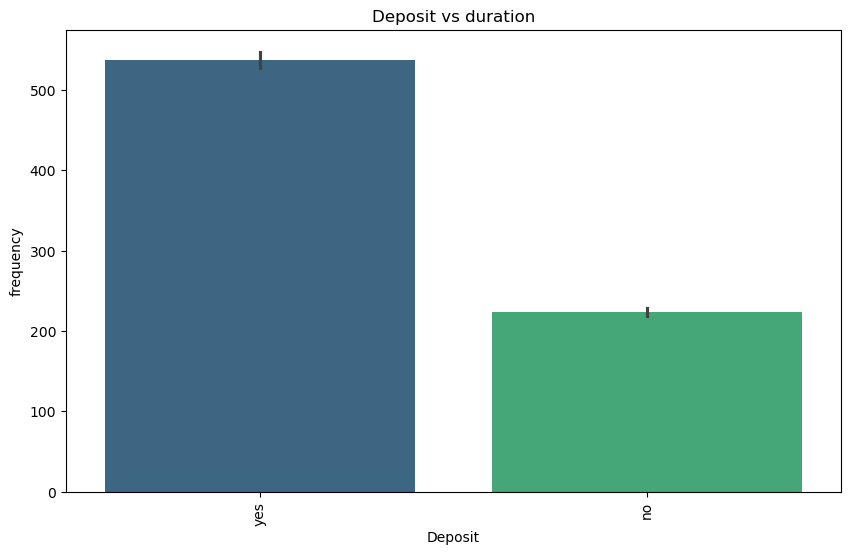

In [100]:
# comparing call duration and deposit
plt.figure(figsize=(10,6))
sns.barplot(x='deposit', y='duration', data=df, palette='viridis')
plt.title('Deposit vs duration')
plt.xlabel('Deposit')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()  

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import mlflow.sklearn
import mlflow.catboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  classification_report




In [102]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [103]:
# defining the features and target variable
X= df.drop('deposit', axis=1)
y= df['deposit']

In [104]:
label = LabelEncoder()
y= label.fit_transform(y)

In [105]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64"]).columns


In [106]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)


In [107]:
# Define CatBoost model
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.2, verbose=0)


In [108]:
# Create pipeline
pip_cat = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model),
])


In [109]:
pip_cat

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x303b567b0>)])

In [110]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [111]:
pip_cat.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x303b567b0>)])

In [112]:
# Make predictions
y_pred = pip_cat.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [113]:
report = classification_report(y_test, y_pred,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.88      0.85      1058
           2       0.00      0.00      0.00         0

    accuracy                           0.86      2233
   macro avg       0.57      0.57      0.57      2233
weighted avg       0.86      0.86      0.86      2233



In [129]:
acc_cat= accuracy_score(y_test, y_pred)
print(acc_cat)

0.8589341692789969


In [114]:
model= LogisticRegression(  max_iter=15000, random_state=42, verbose=2, n_jobs=-1)
pip_log = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model),
])

In [115]:
pip_log.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           52     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.24196D-01

At iterate    1    f=  5.34659D-01    |proj g|=  8.15962D-02

At iterate    2    f=  4.93229D-01    |proj g|=  8.53840D-02

At iterate    3    f=  4.67663D-01    |proj g|=  3.10384D-02

At iterate    4    f=  4.57457D-01    |proj g|=  1.94127D-02

At iterate    5    f=  4.51761D-01    |proj g|=  1.58988D-02

At iterate    6    f=  4.43458D-01    |proj g|=  1.29808D-02

At iterate    7    f=  4.30217D-01    |proj g|=  1.32083D-02

At iterate    8    f=  4.23377D-01    |proj g|=  3.19460D-02

At iterate    9    f=  4.17547D-01    |proj g|=  5.31183D-03

At iterate   10    f=  4.16290D-01    |proj g|=  3.00266D-03

At iterate   11    f=  4.15361D-01    |proj g|=  2.96765D-03

At iterate   12    f=  4.14208D-01    |proj g|=  7.30929D-03

At iterate   13    f=  4.1

 This problem is unconstrained.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=15000, n_jobs=-1, random_state=42,
                                    verbose=2))])

In [116]:
y_pred_log= pip_log.predict(X_test)
y_pred_log

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
report = classification_report(y_test, y_pred_log,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1175
           1       0.83      0.80      0.81      1058
           2       0.00      0.00      0.00         0

    accuracy                           0.83      2233
   macro avg       0.55      0.55      0.55      2233
weighted avg       0.83      0.83      0.83      2233



In [149]:
acc_log= accuracy_score(y_test, y_pred_log)
print(acc_log)

0.8262427227944469


In [118]:
model= RandomForestClassifier(n_estimators=1000, random_state=42, verbose=1, n_jobs=-1)
pip_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model),
])
pip_rf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                        random_state=42, verbose=1))])

In [119]:
pip_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                        random_state=42, verbose=1))])

In [120]:
y_pred_rf= pip_rf.predict(X_test)
y_pred_rf

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.7s finished


array([1, 1, 1, ..., 1, 1, 1])

In [121]:
report = classification_report(y_test, y_pred_rf,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1175
           1       0.82      0.89      0.85      1058
           2       0.00      0.00      0.00         0

    accuracy                           0.86      2233
   macro avg       0.57      0.57      0.57      2233
weighted avg       0.86      0.86      0.86      2233



In [122]:
acc_rf= accuracy_score(y_test, y_pred_rf)
acc_rf

0.8557993730407524

In [138]:
import mlflow
import mlflow.sklearn
import pickle
from mlflow.models.signature import infer_signature


In [ ]:
# Log model and metrics



mlflow.set_experiment('prediction')
with mlflow.start_run(run_name='Random_proj'):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_metric("acc_rf", acc_rf  )
    mlflow.sklearn.log_model(pip_rf, "random_forest_model",input_example=input_example, signature=signature)
    signature = infer_signature(input_example, model.predict(input_example))
    



mlflow.set_experiment('prediction')
with mlflow.start_run(run_name='Cat_proj'):
    mlflow.log_param("model", "CatBoostClassifier")
    mlflow.log_metric("acc_cat", acc_cat  )
    mlflow.sklearn.log_model(pip_cat, "catboost_model", input_example=input_example, signature=signature)
    signature = infer_signature(input_example, model.predict(input_example))



mlflow.set_experiment('prediction')
with mlflow.start_run(run_name='Log_proj'):
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("acc_log", acc_log  )
    mlflow.sklearn.log_model(pip_log, "logistic_model", input_example=input_example, signature=signature)
    signature = infer_signature(input_example, model.predict(input_example))    

    
        


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [178]:



if acc_cat > 0.81:  
        best_model = pip_cat
        best_model_name = "CatBoostClassifier.pkl"
elif acc_log > 0.81:
        best_model = pip_log
        best_model_name = "LogisticRegression.pkl"
else:
        best_model = pip_rf
        best_model_name = "RandomForest.pkl"
    
with open(best_model_name, "wb") as f:
    pickle.dump(best_model, f)
    print(f"Best model saved as {best_model_name}")

        
 





Best model saved as CatBoostClassifier.pkl
